<h3>Lab 4/5: Mini-Assignment<br></h3>

# ANZ Lab Assignment

---

### Declaration

*I am aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and I declare that this assignment is my own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

Name: Hari Vignesh Amirthalingam

Date: 18/09/2021

---

## Task

Investigate the similarities and differences between Australia and New Zealand on a demographic feature of your choice, as discussed in the accompanying assignment sheet `ANZAssign.pdf`.

---

# Context

There is a modern stereotype that marriages are becoming more uncommon in third world countries and that increase in education and career opportunities for women have also played a key factor in this. We would be analysing data from Australia and New Zealand to answer some of these notions.

**Question: What fragment of the population have choose to not marry, relative to the married population and does gender have significance in this context? How do these factors compare between Australia and New Zealand?**


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data Acquisition

Data for the analysis was gathered form the New Zealand’s 2018 census and Australia’s 2016 census for legally registered relationship statuses for the population aged 15 and above. The data files were downloaded as csv files from their respective websites (nzdotstat.stats.govt.nz & abs.gov.au). 

Both data files contained information regarding the legally registered relationship statuses with regards to age and gender, but we would not be using the information for age, thus to remove excess data and due to data presentation of both csv’s being different, data cleaning is required individually.


In [3]:
def get_dat():
	nz=open('TABLECODE8395_Data_c40602e5-c87c-44d2-99f0-a1ed141770c9.csv','r')
	aus=open('2016Census_G05_AUS.csv','r')
	return nz,aus

# Data Cleaning

The cleaning of New Zealand's data is performed via 3 functions; clean_nzl(),filter(),clean_nzl2().

In [4]:
#filters the necessary columns of gender, type of legal relationship and the no. of people-used in clean_nzl() function
def filter(List): 
	ind=[1,4,6] #list of indexes of required values
	new_value=[]
	count=0
	for count, val in enumerate(List):
		if '"Total people - age group"' in List:
			val=val.strip('"') 
			if count in ind:
				new_value.append(val)
			else:
				continue
	return new_value #list of filtered categories for all age groups 



Th clean_nzl() function imports the csv data via get_dat() and iterates through each line of the csv. Using the filter() function, which filters out the age-related data, it output a list of lists containing data regarding legal relationship and genders. The clean_nzl2() shortens the names of the relationship statuses and outputs a list of list as done previously.

In [34]:
def clean_nzl():

	gender_cat=[] 

	nz_data= get_dat()[0]
	for line,value in enumerate(nz_data):
		if line > 0:
			l_value=value.split(',')
			new_value= filter(l_value) #uses filtered() function to remove unnecessary categories and excess data by different age groups
			if len(new_value)>0: #filters out empty lists
				gender_cat.append(new_value)

	return(gender_cat) #list legal relationships by gender




In [36]:
def clean_nzl2(): #shortens the names of different statuses

	gender_cat=[]
	data = clean_nzl()

#the loop shortens name of the statuses by removing excess info frm the names 
	for count,i in enumerate(data):
		if count>=0:
			line=i[0].split()
			if 'Never' in line:
				i[0]=line[0]+' '+line[1]
			elif 'Not' in line or 'Total' in line:
				i[0]=i[0]
			else:
				i[0]=line[0]
			gender_cat.append(i)
	return gender_cat

Australia's csv file just contained 2 lines of information; this data is cleaned using the 2 functions, output(h,n) and clean_aus().

In [7]:
#Takes inputs of a list relationship status names and list of no. of people
#filters out the required headings excluding age related data

def output(h,n): 
	ind=[]
	output_h=[]
	output_p=[]
	for index,value in enumerate (h):
		val=value.split('_')
		if 'M' in val or 'F' in val or 'P' in val:
			if val[1]=='Tot':  #filters the names that have both genders and totals only, ignoring names with ages
				if 'Never' in val:
					output_h.append(val[0]+' '+val[-2]+' '+val[-1])
				else:
					output_h.append(val[0]+' '+val[-1])
				output_p.append(n[index]) #appends no.of people under the corresponing to the index of the respectinve relationship statuses
	return output_h, output_p

The clean_aus() function also imports the csv data via get_dat() function. It iterates through the 2 lines, separating the headings and the values for no. of people. These lines are then used in the output(h,n) function where the age relevant data are filtered out alomng with the names of relationship statuses modified to be more concise for viewing, it returns back 2 lists of data for headings and no. of people into clean_aus().

In [8]:
def clean_aus():

	heading=[]
	people=[]
	aus_data= get_dat()[1]

	for line, data in enumerate(aus_data): 
		data=data.strip('\n').split(',') #removes the tab at the end of each lines and splits it into each line into lists at ","
		if line==0:
			heading=data
		else:
			people=data
	clean_h= output(heading,people)[0]
	clean_p=output(heading,people)[1]

	return clean_h,clean_p

# Interpretation

The interpretation of data would would occur in two stages:
 1. Analysis of overall data
 2. Analysis of gender relevance

**1. Analysis of overall data**

Using the cleaned data from each country, relevant information regarding the total no. of people registered and the total no. of people who fall under the different relationship statuses are extracted. The no. of people are converted to percentages.

In [28]:
clean_h=clean_aus()[0]
clean_p=clean_aus()[1]
aus_tot_m=[] # would be used in the bar graph later
aus_tot_f=[]# would be used in the bargraph later

#Extracting data for pie chart for Australia's distribution of legally registered relationship statuses-------------------------------------------------------

aus_tot_h=[] #the legally registered relationship statuses
aus_perc=[] #percentage of population

aus_tot= int(clean_p[-1])

for ind, st in enumerate(clean_h):
	if 'P' in st.split() and 'Tot' not in st.split():  #creates a lists to store values corresponding to each relationship status (irrespective of gender)
		aus_tot_h.append(st.lstrip('P '))  #removes the 'P' in the string of relationship status names
		percentage= (int(clean_p[ind])/aus_tot)*100
		aus_perc.append(round(percentage,1))
	if 'M' in st.split() and 'Tot' in st.split(): #would be used for the bargraph later
		aus_tot_m.append(int(clean_p[ind]))
	if 'F' in st.split() and 'Tot' in st.split(): #would be used for the bar graph later
		aus_tot_f.append(int(clean_p[ind]))

#Extracting data for pie chart for New Zealand's distribution of legally registered relationship statuses-------------------------------------------------------

nz_tot_status=[] #the legally registered relationship statuses
nz_tot_perc=[] #percentage of population
nz_total= int(clean_nzl2()[0][-1])
nz_data=clean_nzl2()

for count, val in enumerate(nz_data):
	if count>0 and 'Total people - sex'in val and 'Total people stated'not in val :
		percentage=(int(val[-1])/nz_total)*100
		nz_tot_status.append(val[0])
		nz_tot_perc.append(round(percentage,1))

The extracted data are used to plot pie charts for New Zealand and Australia, respectively; using matplotlib.

Text(0.5, 1.0, 'Distribution of legally registered relationships in Australia')

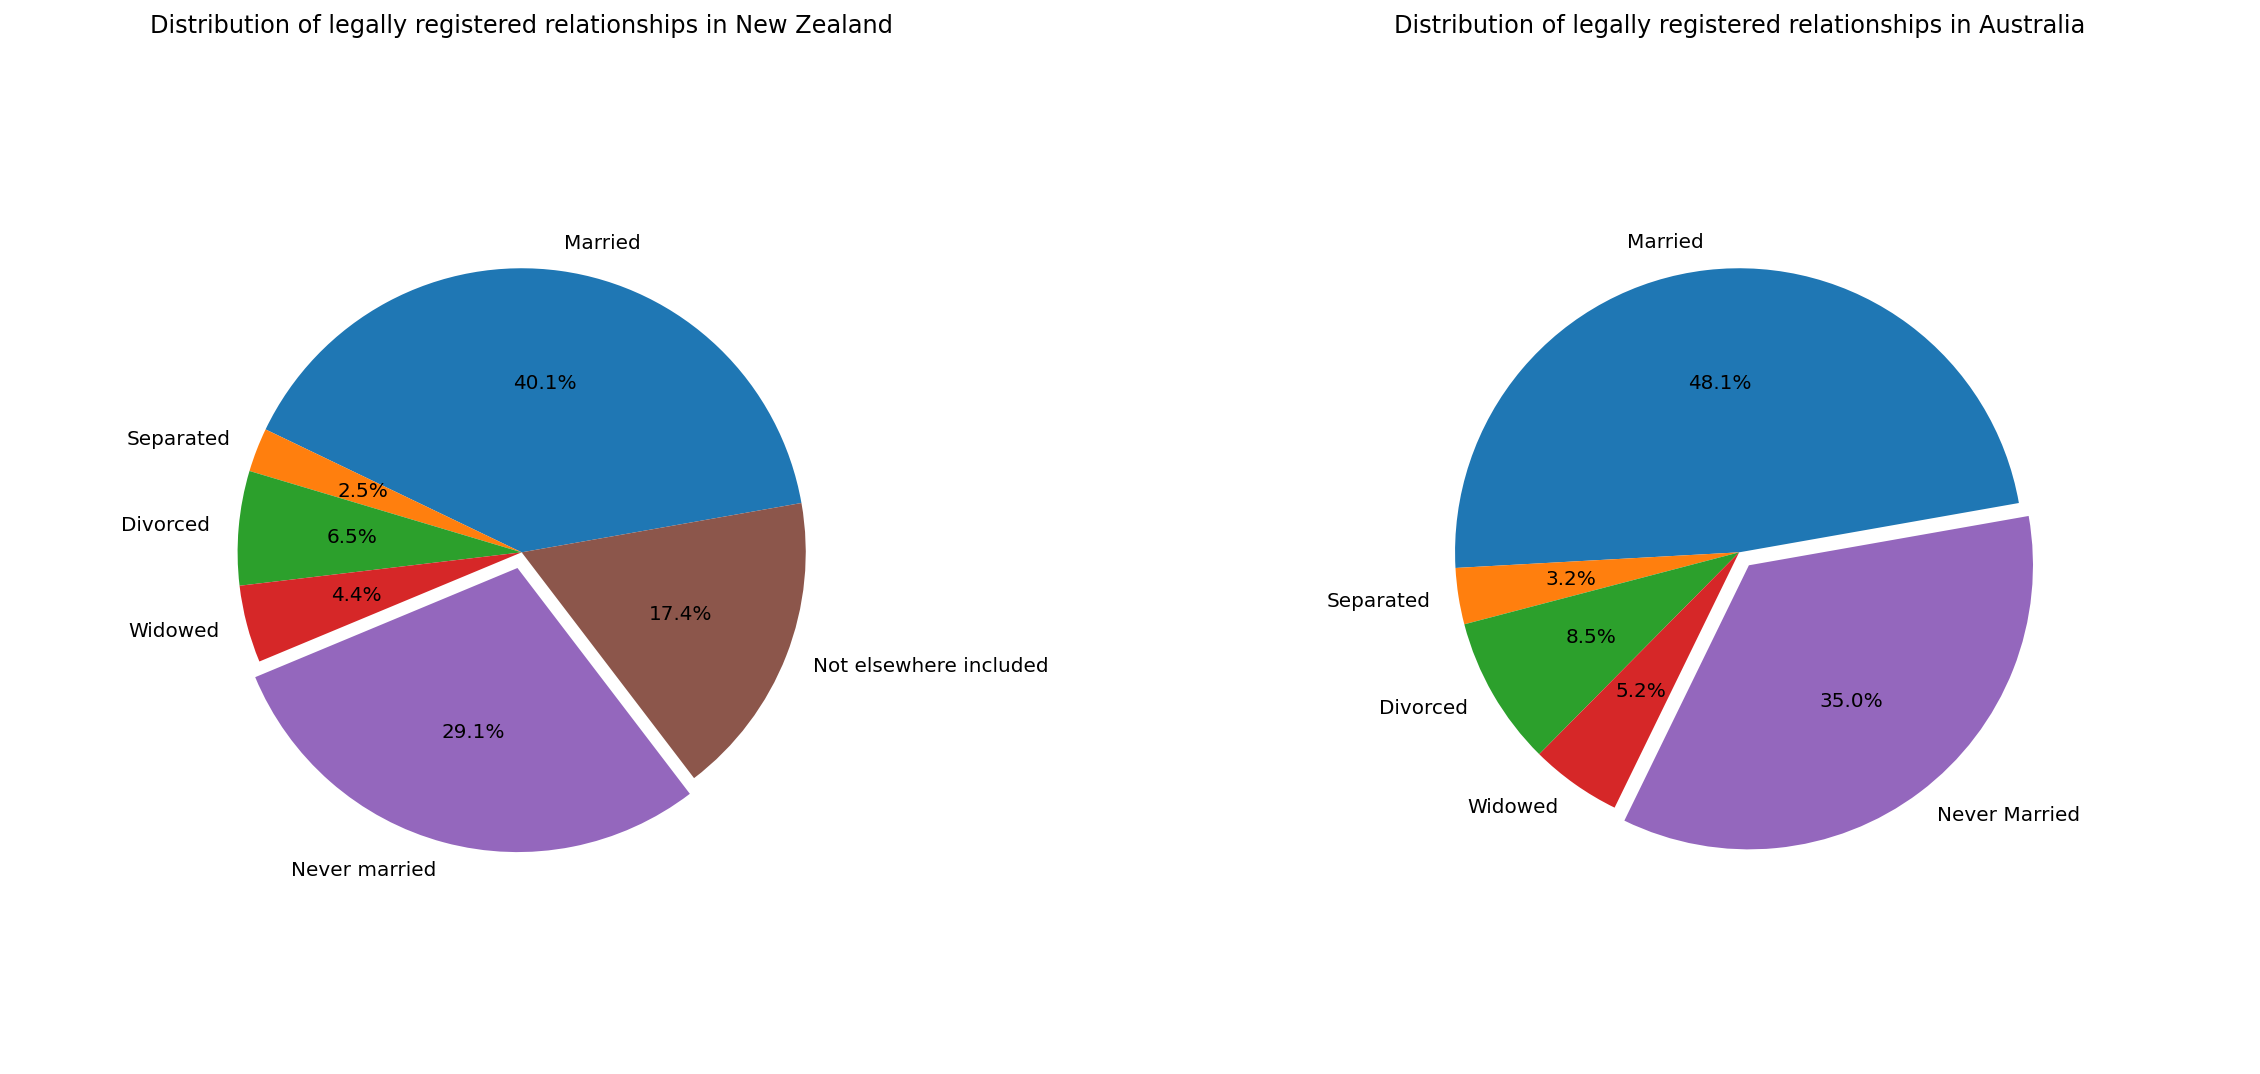

In [39]:
fig,(pie1,pie2) = plt.subplots(1,2,figsize=(20,20)) 

#creates the Pie chart for New Zealand 
labels = nz_tot_status
sizes = nz_tot_perc
explode=(0,0,0,0,0.04,0) #elaborates on the inportant section analysed
pie1.pie(sizes,explode,labels=labels,autopct='%1.1f%%',startangle=10,radius=0.7) 
pie1.set_title('Distribution of legally registered relationships in New Zealand')

#creates the Pie chart for Australia 
labels = aus_tot_h
sizes = aus_perc
explode=(0,0,0,0,0.04)
pie2.pie(sizes,explode,labels=labels,autopct='%1.1f%%',startangle=10,radius=0.7) 
pie2.set_title('Distribution of legally registered relationships in Australia')

**Remarks** :
	1. Overall Aus and NZ show similarities in the distribution of the different relationship statuses in its population.
	2. We could observed the 'Never Married' segment being the second largest segment for both countries after 'Married' people.
	3. On a more deeper account Australia seems to have a larger fragment of people under all common categories displayed (with variations ranging form 0.7-8%) except for 
	   New Zealand having a slightly larger segment of widowed people (0.8% more)

**2. Anlysis of Gender Relevance**

From the cleaned data of New Zealand further extraction is done to obtain data specific to male / female and the population values are converted to percentages for ease of analysis and to make a reasonable comparison between the two countries. 

The data is used to plot a bar graph with male and female bars side by side for each of the relationship statuses.

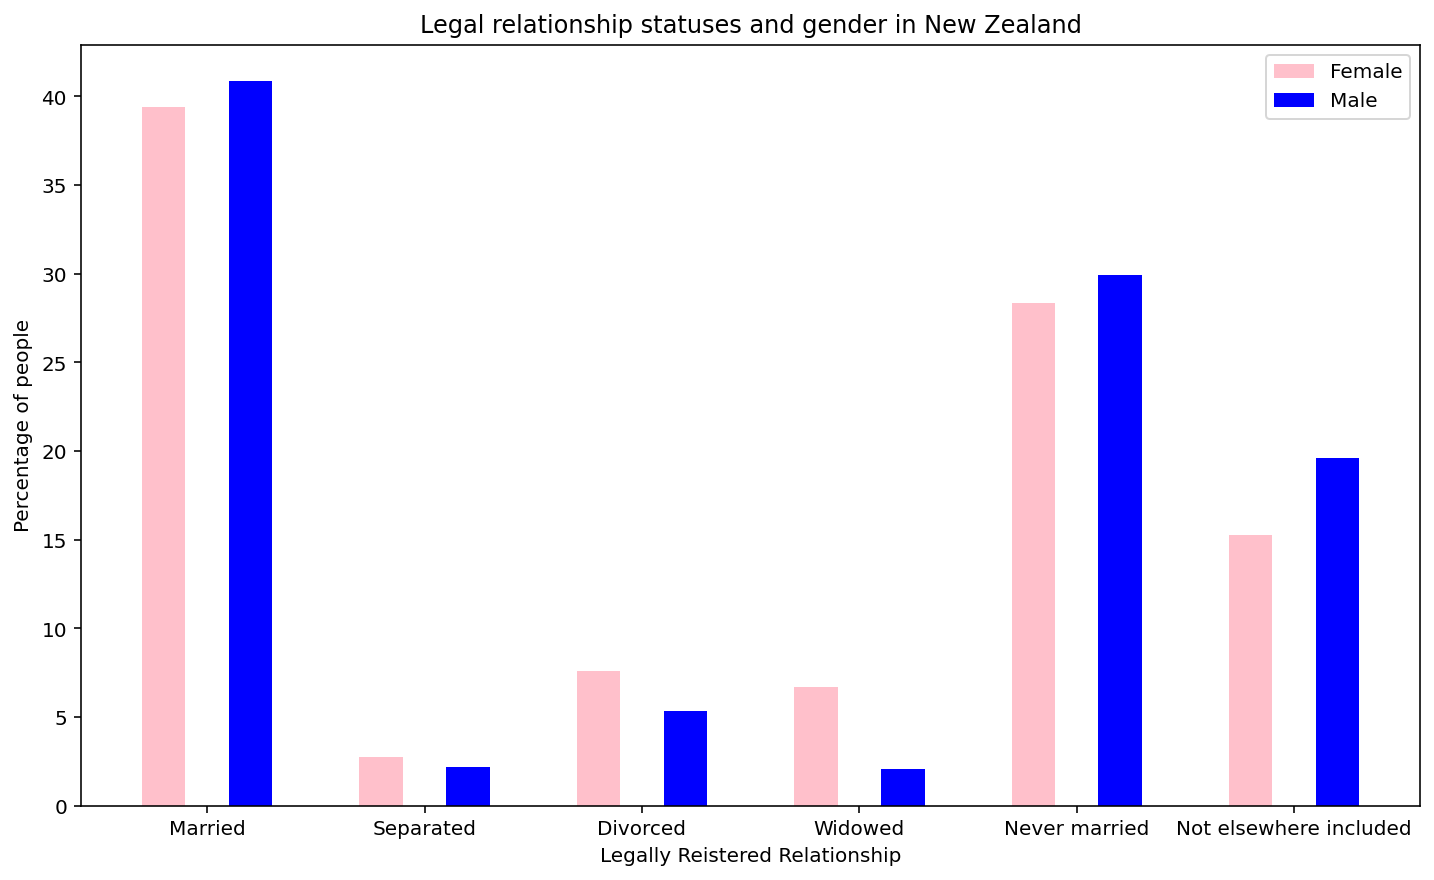

In [47]:
#Extracting data for bar chart for New Zealand's distribution of marital statuses by genders---------------------------------------
nz_status=[]
nz_f_pop=[]
nz_m_pop=[]
nz_tot_m= int(nz_data[1][-1]) #total no. of registered males
nz_tot_f= int(nz_data[2][-1]) #total no. of registered females 

for count, val in enumerate(nz_data):
	if count>3 and 'Total people - sex'not in val and 'Total people stated'not in val :
		if 'Male' in val:
			nz_status.append(val[0])
			percentage_male=(int(val[-1])/nz_tot_m)*100
			#nz_m_pop.append(int(val[-1]))
			nz_m_pop.append(percentage_male)
		else:
			percentage_female=(int(val[-1])/nz_tot_f)*100
			nz_f_pop.append(percentage_female)

#plotting bar graph-----------------------------------------------------------------------------------------------------------------
x=np.arange(len(nz_status))
y1=nz_m_pop
y2=nz_f_pop

plt.bar(x-0.2, y2, width=0.2,color='pink',label='Female')
plt.bar(x+0.2, y1, width=0.2,color='blue',label='Male')

plt.xticks(x, nz_status)
plt.xlabel("Legally Reistered Relationship")
plt.ylabel("Percentage of people")
plt.title("Legal relationship statuses and gender in New Zealand")
plt.legend()
plt.show()

Bar graph for the Australian data:

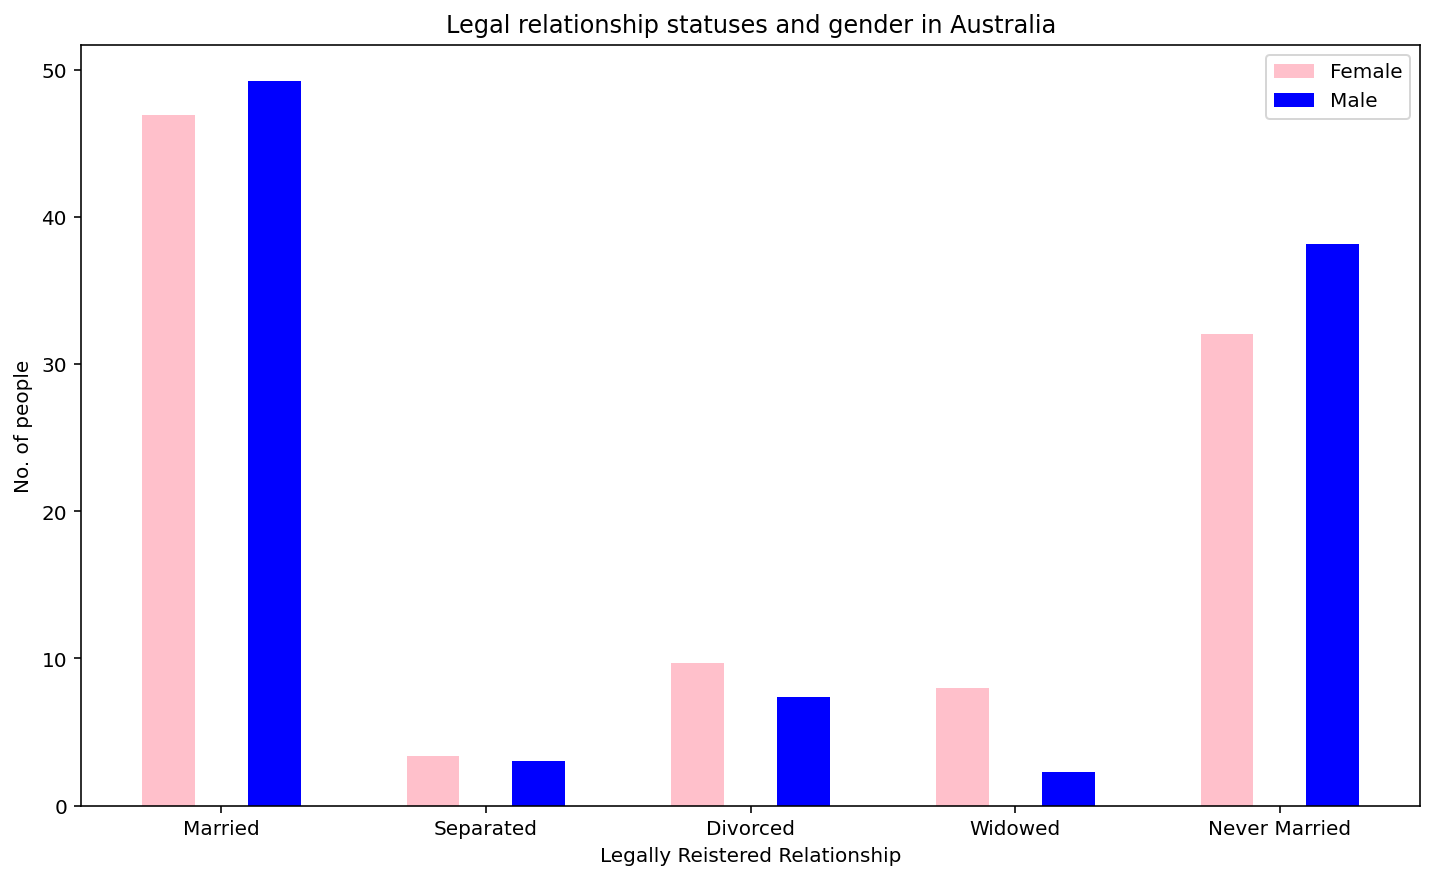

In [42]:
aus_status=[] #the legally registered relationship statuses
aus_f_pop=[] #no. of males
aus_m_pop=[] #no. of females
aus_tot_male= int(aus_tot_m[0])
aus_tot_female= int(aus_tot_f[0])


for ind, st in enumerate(clean_h): # filters out the values corresponding to each gender for each of the status categories
	if 'M' in st.split() and 'Tot' not in st.split():
		percentage_male=(int(clean_p[ind])/aus_tot_male)*100
		aus_m_pop.append(percentage_male)
	if 'F' in st.split() and 'Tot' not in st.split():
		aus_status.append(st.lstrip('F '))
		percentage_female=(int(clean_p[ind])/aus_tot_female)*100
		aus_f_pop.append(percentage_female)

#Plotting the bar chart--------------------------------------------------------------------------------------------------------
x=np.arange(len(aus_status))
y1=aus_m_pop
y2=aus_f_pop

plt.bar(x-0.2, y2, width=0.2,color='pink',label='Female')
plt.bar(x+0.2, y1, width=0.2,color='blue',label='Male')

plt.xticks(x, aus_status)
plt.xlabel("Legally Reistered Relationship")
plt.ylabel("No. of people")
plt.title("Legal relationship statuses and gender in Australia")
plt.legend()
plt.show()

**Observations:**
	1. As observed on the pie charts we could see similar distributions between both countries with large spikes for the percentage of married and never married people compared to divorced/separated/widowed.
	2. Percentage of unmarried men are greater than women, the difference is most significant in Australia.
	3. Percentage of married men are greater than women and in the case of both countries, the bars are almost neck-neck for males and females
	4. Compared to men we could observe women having making up the greater portion of the separated, divorced and the widowed segment of the population for both countries.

# Conclusion

Via analysing the population aged 15 and above for New Zealand and Australia we could infer that despite being the second largest faction after the married population, the segment of the never married population is reletively large; whith a ratio of married:never married at 1:0.73 for both New Zealand and Australia.**Thus, if not a direct correlation, it does support the claim of the diminishing interest towards marriage.**                                                                                   
Through the analysis of gender and legal relationship statuses, we could infer that both New Zealand and Australia show males as the majority of the unmarried category and married category relative to females; **thus this challenges the notion of the increase in education and career opportunities for women having an effect on the people opting not to get married, in the current contect of Australia and New Zealand.** Despite males having a greater proportion of the married and never married and females having a greater proportion in the widowed, divorced or separated;**we cannot confirm the significance of this difference due visually observable differences being very small between the two groups for all categories.**
The close proximity of New Zealand and Australia could be a factor for similar social constructs thus an explanation for the similarity in several observations.

(on a side note, the analysis was made using the data available and the fact that some of the data from New Zealand were classed - 'Not included elsewhere' could be a cause for some uncertainty)

In [0]:
S